<a href="https://colab.research.google.com/github/furkanuyanik/churn-analysis/blob/master/ChurnAnalysis2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

In [26]:
# Read CSV File
df = pd.read_csv("./churn.csv")

# Convert values to lower values
for item in df.columns:
    try:
        df[item] = df[item].str.lower()
    except:
        print(item, "couldn't convert")

# Replace Categorical values to Numerical values (yes-no / 1-0)
columns_to_convert = ['Partner', 
                      'Dependents', 
                      'PhoneService', 
                      'PaperlessBilling', 
                      'Churn']

for item in columns_to_convert:
    df[item].replace(to_replace='yes', value=1, inplace=True)
    df[item].replace(to_replace='no',  value=0, inplace=True)

# TotalCharges is DataType still Objcet. Needs to fix Float.
df['TotalCharges'] = df['TotalCharges'].replace(r'\s+', np.nan, regex=True)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

## Number of churn
churners = (df[df['Churn'] == 1])
churners_count = len(churners)

## Churn datası kadar Churn olmayan datası elde et.
non_churners = df[df['Churn'] == 0].sample(n=churners_count)

## New Churn Datas
df2 = churners.append(non_churners)

# Remove 'customerId' column at data because 'customerId' is categorical column. 
try:
    customer_id = df2['customerID']
    del df2['customerID']
except:
    print("already removed customerID")

# Convert Categorical Columns to Numerical Columns with One-Hot Encoding method
ml_dummies = pd.get_dummies(df2)
ml_dummies.fillna(value=0, inplace=True)

# Independent columns
X = ml_dummies.iloc[:, 0:len(ml_dummies.columns)]  

# Target column i.e price range
y = ml_dummies.iloc[:, -1]    

SeniorCitizen couldn't convert
tenure couldn't convert
MonthlyCharges couldn't convert


[1.55725643e-03 2.52633477e-03 1.66413424e-03 2.28849831e-02
 2.28858302e-04 2.88274577e-03 3.34291961e-02 2.84823689e-02
 1.95168391e-03 1.64614557e-03 1.81467502e-03 2.48492053e-03
 4.33315717e-04 2.84015683e-03 5.30354479e-03 1.08270115e-02
 4.97493156e-03 1.46734676e-03 7.04322990e-03 1.68968610e-03
 1.04328801e-03 1.01808601e-02 1.22666369e-03 1.75728115e-03
 8.77655765e-03 1.00792274e-03 2.42867054e-03 5.92172060e-03
 2.60493834e-03 1.18823959e-03 7.91291463e-03 1.89734641e-03
 1.46967126e-03 1.29948563e-02 1.92097172e-03 2.20097637e-03
 1.08400709e-03 1.62912540e-03 7.35859399e-02 6.51942958e-02
 1.06136318e-01 5.51704909e-01]


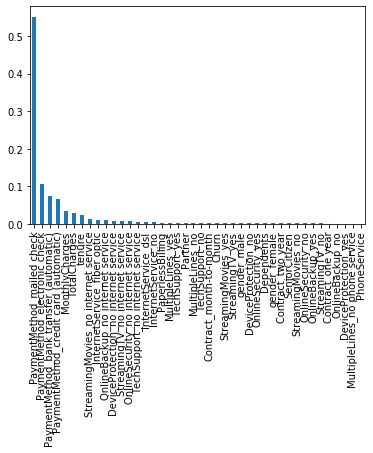

In [29]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

model = RandomForestClassifier()
model.fit(X,y)

print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(100).plot(kind='bar')

plt.show()